3.1 Warming Up Exercises - Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:

In [ ]:
import pandas as pd

#Load the dataset
df = pd.read_csv("bank.csv")

#Inspect the DataFrame
print("DataFrame Info:")
print(df.info())
print()

#Identify columns with dtype='object'
object_columns = df.select_dtypes(include=['object']).columns
print("Columns with dtype=object:", object_columns)
print()

#Unique values of those columns
print("Unique values in columns with dtype=object:")
for col in object_columns:
    print(f"{col}: {df[col].unique()}")
print()

#Check for the total number of null values in each column
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)
print()

#Drop all object dtype columns
df_numeric = df.drop(columns=object_columns)
df_numeric.to_csv("banknumericdata.csv", index=False)
print("New DataFrame with numeric data saved as 'banknumericdata.csv'")
print()

#Read the numeric data and find summary statistics
numeric_data = pd.read_csv("banknumericdata.csv")
print("Summary Statistics of Numeric DataFrame:")
print(numeric_data.describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Columns with dtype=object: Index(['job', 'marital', 'education', 'default', '

Problem 2 Data Imputation

In [ ]:
import pandas as pd

#Load the dataset
df = pd.read_csv("medical_students_dataset.csv")

#Check info and missing values
print(df.info())
print("\nColumns with Missing Values:")
print(df.isnull().sum())
print()

#Fill missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            # Fill categorical columns with mode
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            # Fill numerical columns with mean
            df[column].fillna(df[column].mean(), inplace=True)

print("Missing values after filling:")
print(df.isnull().sum())
print()

#Check and remove duplicate rows
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicate rows removed.")

# Save cleaned dataset
df.to_csv("medical_student_cleaned.csv", index=False)
print("Cleaned data saved to 'medical_student_cleaned.csv'.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Columns with Missing Values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight         

<ipython-input-10-7c199937e01f>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-10-7c199937e01f>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

Duplicate rows: 12572
Duplicate rows removed.
Cleaned data saved to 'medical_student_cleaned.csv'.


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Problem 1

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Create a subset DataFrame with selected columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Retain only rows where 'Pclass' is equal to 1 (first-class passengers)
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Calculate statistics for the 'Fare' column
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

# Print the results
print("Statistics for 'Fare' column (First-Class Passengers):")
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")


Statistics for 'Fare' column (First-Class Passengers):
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem 2

In [ ]:
# Count the number of null values in the 'Age' column of the subsetted DataFrame
null_count_age = first_class_df['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column: {null_count_age}")

# Drop rows with null values in the 'Age' column
first_class_df = first_class_df.dropna(subset=['Age'])
print(f"Number of rows after dropping null values in 'Age': {len(first_class_df)}")


Number of null values in the 'Age' column: 0
Number of rows after dropping null values in 'Age': 186


Problem 3

In [ ]:
import pandas as pd

#Load the Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")

#Perform one-hot encoding for the 'Embarked' column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

#Add the new columns to the original DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

#Drop the original 'Embarked' column
df = df.drop(columns=['Embarked'])

#Print the first few rows of the modified DataFrame to verify the changes
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem 4

Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-21-495e6cb94eb0>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='pastel')
<ipython-input-21-495e6cb94eb0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='pastel')


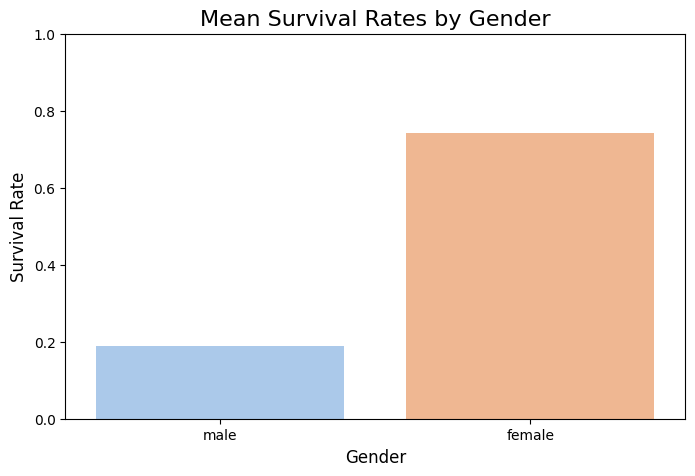

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Calculate mean survival rates for different groups in the 'Sex' column
mean_survival_rates = df.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by Gender:")
print(mean_survival_rates)

# Visualization: Survival distributions by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='pastel')
plt.title("Mean Survival Rates by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.ylim(0, 1)  # Survival rates range from 0 to 1
plt.show()


Problem 5

<ipython-input-5-bce1bcf7ccca>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df, ci=None, palette='muted')


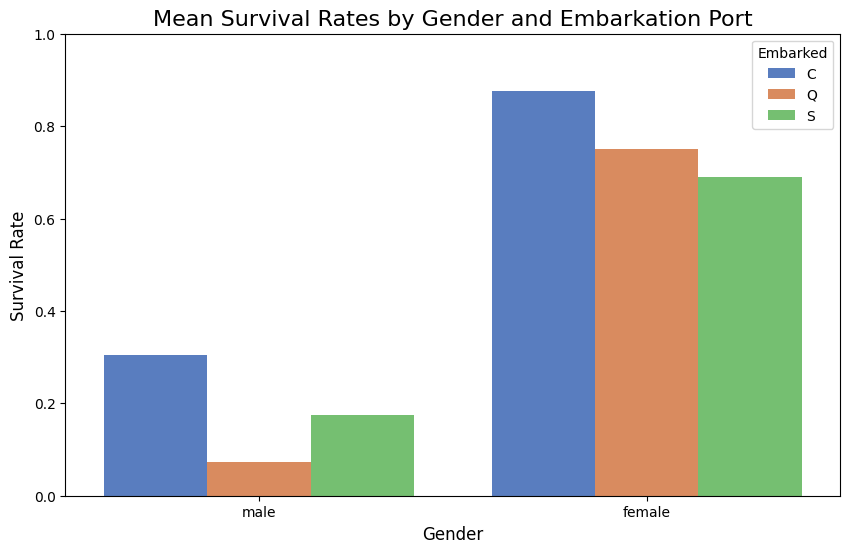

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Convert 'Embarked' column to categorical for better visualization handling
df['Embarked'] = df['Embarked'].astype('category')

# Create a visualization that compares survival rates by gender and embarkation port
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df, ci=None, palette='muted')

# Add titles and labels
plt.title("Mean Survival Rates by Gender and Embarkation Port", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.ylim(0, 1)  # Survival rates range from 0 to 1

# Show the plot
plt.show()
